<h1> 🏎️ F1 2021 Championship Battle Controversy   </h1>
<h4 style="color:#555; margin-top:-8px;">
 Sentiment Analysis - Using VADER, TextBlob, TF-IDF + Logistic Regression & SVM </h4>

<hr style="border:1px solid #ddd;">


<div style="background-color:pink; padding:16px; border-radius:8px; border-left:5px solid red;">

📌 **Problem Statement :** High-profile sporting events can rapidly shift public perception and brand sentiment across digital platforms. The controversial 2021 Formula 1 championship finale provides a real-world case study of how high-stakes, event-driven moments influence large-scale public discourse.

This project designs and evaluates a scalable sentiment classification framework to:

- Detect shifts in public sentiment during major event-driven disruptions.
- Identify divergence across stakeholder groups (e.g., Hamilton vs. Verstappen supporters).
- Measure sentiment polarization beyond simple aggregate averages.
- Compare lexicon-based (VADER, TextBlob) and supervised machine learning models (Logistic Regression, SVM).
- Improve negative sentiment detection to better capture emerging reputational risk signals.

By combining rule-based sentiment scoring with supervised classification models, the study evaluates model performance and optimization strategies for detecting critical discourse during controversial events.
</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>  📂
    Dataset Overview </h3>
</div>

**Challenge:** This study analyzes Twitter discourse surrounding the 2021 Formula 1 Championship finale (December 12, 2021) — a highly controversial title-deciding race between Lewis Hamilton and Max Verstappen

**File Used:** `f1_tweets.csv`  

**Dataset Source:** Kaggle  
https://www.kaggle.com/datasets/kaushiksuresh147/formula-1-trending-tweets

**Dataset Structure** 

<table style="border-collapse: collapse; width: 100%; font-size: 12px;">
  <tr style="background-color:#f2f2f2;">
    <th style="text-align:left; padding:4px;">Column Name</th>
    <th style="text-align:left; padding:4px;">Data Type</th>
    <th style="text-align:left; padding:4px;">Description</th>
  </tr>

  <tr><td style="padding:4px;">user_name</td><td style="padding:4px;">string</td><td style="padding:4px;">Twitter username of the author</td></tr>
  <tr><td style="padding:4px;">user_location</td><td style="padding:4px;">string</td><td style="padding:4px;">Self-reported user location</td></tr>
  <tr><td style="padding:4px;">user_description</td><td style="padding:4px;">string</td><td style="padding:4px;">User bio / profile description</td></tr>
  <tr><td style="padding:4px;">user_created</td><td style="padding:4px;">datetime</td><td style="padding:4px;">Date the user account was created</td></tr>
  <tr><td style="padding:4px;">user_followers</td><td style="padding:4px;">int</td><td style="padding:4px;">Number of followers</td></tr>
  <tr><td style="padding:4px;">user_friends</td><td style="padding:4px;">int</td><td style="padding:4px;">Number of accounts followed</td></tr>
  <tr><td style="padding:4px;">user_favorites</td><td style="padding:4px;">int</td><td style="padding:4px;">Total number of tweets liked</td></tr>
  <tr><td style="padding:4px;">user_verified</td><td style="padding:4px;">boolean</td><td style="padding:4px;">Verified account status</td></tr>
  <tr><td style="padding:4px;">date</td><td style="padding:4px;">datetime</td><td style="padding:4px;">Timestamp when the tweet was posted</td></tr>
  <tr><td style="padding:4px;">text</td><td style="padding:4px;">string</td><td style="padding:4px;">Raw tweet content</td></tr>
  <tr><td style="padding:4px;">hashtags</td><td style="padding:4px;">list / string</td><td style="padding:4px;">Extracted hashtags from tweet</td></tr>
  <tr><td style="padding:4px;">source</td><td style="padding:4px;">string</td><td style="padding:4px;">Device or platform used</td></tr>
  <tr><td style="padding:4px;">is_retweet</td><td style="padding:4px;">boolean</td><td style="padding:4px;">Whether the tweet is a retweet</td></tr>
</table>

**Importing the Required Files**

In [524]:
# Core / Utilities
import re
import json
import requests
from collections import Counter
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display, Markdown
# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)

In [ ]:
https://www.kaggle.com/datasets/kaushiksuresh147/formula-1-trending-tweets
https://www.kaggle.com/code/jtrotman/f1-race-traces-2021

In [8]:
file = ".data/F1_tweets.csv"

In [5]:
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict

In [523]:
df = pd.read_csv(file, low_memory=False)
df .head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Zack Shephard,NaN,My opinions are mine ALONE. Venting is the onl...,2011-12-03 20:36:55,89.0,2598,212886,False,2021-08-01 23:59:18,The next great #F1 duo!!! @ESPNF1 https://t.co...,['F1'],Twitter for iPhone,False
1,Matteo Vannucci,NaN,"Free speech, free ideas, random thoughts",2010-05-28 01:02:32,10.0,40,8,False,2021-08-01 23:59:10,@F1 What if…Hamilton would have gone to the pi...,"['HungarianGP', 'F1']",Twitter for iPhone,False
2,Michelle,The Burbs,"likes- movies, candy, being lazy, formula 1, ...",2009-03-04 16:53:13,231.0,110,428,False,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,['f1'],Twitter for Android,False
3,JoshWFC 🇧🇷,NaN,| JP10’s biggest fan | pronouns : João/Pedro |...,2021-04-05 16:14:53,156.0,443,2994,False,2021-08-01 23:58:11,Valteri Bottass tracking down Max Verstappen o...,['F1'],Twitter for iPhone,False
4,Ria Tagulinao,MNL,Fun-sized Filipina writer @Medium,2009-06-22 16:08:51,833.0,379,30891,False,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,"['HungarianGP', 'F1']",Twitter for iPhone,False


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Statistics</h3>
</div>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632388 entries, 0 to 632387
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         632382 non-null  object 
 1   user_location     443577 non-null  object 
 2   user_description  592917 non-null  object 
 3   user_created      632388 non-null  object 
 4   user_followers    632388 non-null  float64
 5   user_friends      632388 non-null  object 
 6   user_favourites   632388 non-null  object 
 7   user_verified     632388 non-null  object 
 8   date              632388 non-null  object 
 9   text              632388 non-null  object 
 10  hashtags          632360 non-null  object 
 11  source            632384 non-null  object 
 12  is_retweet        632384 non-null  object 
dtypes: float64(1), object(12)
memory usage: 62.7+ MB


In [11]:
df.isna().sum().sort_values(ascending=False).head(20)

user_location       188811
user_description     39471
hashtags                28
user_name                6
source                   4
is_retweet               4
user_created             0
user_followers           0
user_friends             0
date                     0
user_verified            0
user_favourites          0
text                     0
dtype: int64

In [12]:
df.describe(include="all").T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_name,632382,119512,F1reader,10005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_location,443577,34862,United Kingdom,14560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_description,592917,126097,http://t.co/J4fdlafdHW is a F1 news aggregatin...,10005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_created,632388,124215,2010-12-25 13:36:41,10005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_followers,632388.0,NaN,NaN,NaN,45581.93899,490349.577078,0.0,107.0,438.0,2039.0,24096107.0
user_friends,632388.0,15598.0,1.0,3260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_favourites,632388.0,88110.0,11.0,7804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_verified,632388,8,False,415159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,632388,433860,2021-12-12 14:35:25,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,632388,628360,What a race! #F1,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> 🧹Data Cleaning & Preprocessing</h3>
</div>

In [124]:
tweet = "text"
df_clean = df.copy()
df_clean[tweet] = df_clean[tweet].astype(str)
df_clean[[tweet]].head()

,text
0,The next great #F1 duo!!! @ESPNF1 https://t.co...
1,@F1 What if…Hamilton would have gone to the pi...
2,This has been a tiring #f1 day... https://t.co...
3,Valteri Bottass tracking down Max Verstappen o...
4,No words to describe the #HungarianGP so I wil...


In [125]:
def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub(r'@[^\s]+','',tweet)                              # Removes usernames
    tweet = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)   # Remove URLs
    tweet = re.sub(r"\d+"," ", str(tweet))                           # Removes all digits
    tweet = re.sub(r'&quot;'," ", tweet)                               # Remove (&quot;)
   # tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space
    return tweet

In [126]:
df_clean['processed_tweet'] = np.vectorize(process_tweet)(df_clean[tweet])
df_clean.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,location_grouped,processed_tweet
0,Zack Shephard,NaN,My opinions are mine ALONE. Venting is the onl...,2011-12-03 20:36:55,89.0,2598,212886,False,2021-08-01 23:59:18,The next great #F1 duo!!! @ESPNF1 https://t.co...,['F1'],Twitter for iPhone,False,Unknown,the next great duo
1,Matteo Vannucci,NaN,"Free speech, free ideas, random thoughts",2010-05-28 01:02:32,10.0,40,8,False,2021-08-01 23:59:10,@F1 What if…Hamilton would have gone to the pi...,"['HungarianGP', 'F1']",Twitter for iPhone,False,Unknown,what if hamilton would have gone to the pit e...
2,Michelle,The Burbs,"likes- movies, candy, being lazy, formula 1, ...",2009-03-04 16:53:13,231.0,110,428,False,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,['f1'],Twitter for Android,False,Unknown,this has been tiring day
3,JoshWFC 🇧🇷,NaN,| JP10’s biggest fan | pronouns : João/Pedro |...,2021-04-05 16:14:53,156.0,443,2994,False,2021-08-01 23:58:11,Valteri Bottass tracking down Max Verstappen o...,['F1'],Twitter for iPhone,False,Unknown,valteri bottass tracking down max verstappen o...
4,Ria Tagulinao,MNL,Fun-sized Filipina writer @Medium,2009-06-22 16:08:51,833.0,379,30891,False,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,"['HungarianGP', 'F1']",Twitter for iPhone,False,Unknown,no words to describe the hungariangp so will j...


In [306]:
df_clean["datetime"] = pd.to_datetime(df_clean['user_created'],errors='coerce')

In [421]:
def detect_driver(text):
    text = str(text).lower()
    
    ham_pattern = r"\b(hamilton|lewis|lewishamilton)\b"
    ver_pattern = r"\b(verstappen|max|maxverstappen)\b"
    
    has_ham = re.search(ham_pattern, text) is not None
    has_ver = re.search(ver_pattern, text) is not None
    
    if has_ham and has_ver:
        return "Both"
    elif has_ham:
        return "Hamilton"
    elif has_ver:
        return "Verstappen"
    else:
        return "Other"

df_clean["driver"] = df_clean["text"].apply(detect_driver)

In [422]:
df_clean["driver"].value_counts()

driver
Other         454469
Hamilton       76354
Verstappen     56323
Both           45242
Name: count, dtype: int64

In [103]:
race_day = df_clean[
    df_clean["datetime"].dt.date == pd.Timestamp("2021-12-12").date()
].copy()

In [423]:
tweets = df_clean[df_clean["datetime"].dt.year == 2021].copy()

In [312]:
keywords = ["abu dhabi","masi","fia","latifi","safety car","hamilton","verstappen","ad21"]
#tweets = df_clean.cpy() 
#abu_tweets = tweets[tweets["text"].str.contains("|".join(keywords), case=False, na=False)]

In [130]:
tweets.shape

(73812, 16)

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Expolatory Data Analysis</h3>
</div>

In [425]:
tweets.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'location_grouped',
       'processed_tweet', 'datetime', 'tokens', 'driver'],
      dtype='object')

In [426]:
tweets["month"] = tweets["datetime"].dt.to_period("M")

In [427]:
tweets["month"].unique()

<PeriodArray>
['2021-04', '2021-07', '2021-05', '2021-03', '2021-02', '2021-08', '2021-01',
 '2021-06', '2021-09', '2021-10', '2021-11', '2021-12']
Length: 12, dtype: period[M]

In [428]:
monthly_counts = tweets.groupby("month").size()
monthly_counts.index = monthly_counts.index.to_timestamp()

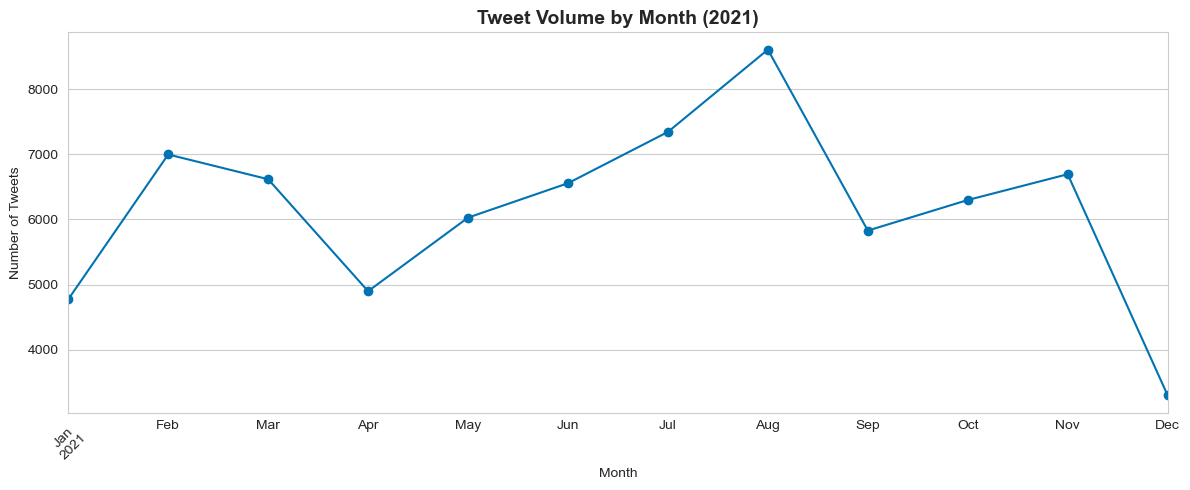

In [429]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
monthly_counts.plot(marker="o")
plt.title("Tweet Volume by Month (2021)", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">

**Analysis**: The surge in tweet volume during August aligns with the Silverstone crash, a high-impact and polarizing event that intensified fan discourse. In contrast, tweet volume declined in December following the Abu Dhabi title decider. This decline may reflect a shift from anticipation-driven engagement to resolution-driven disengagement once the championship outcome was determined.
</div>

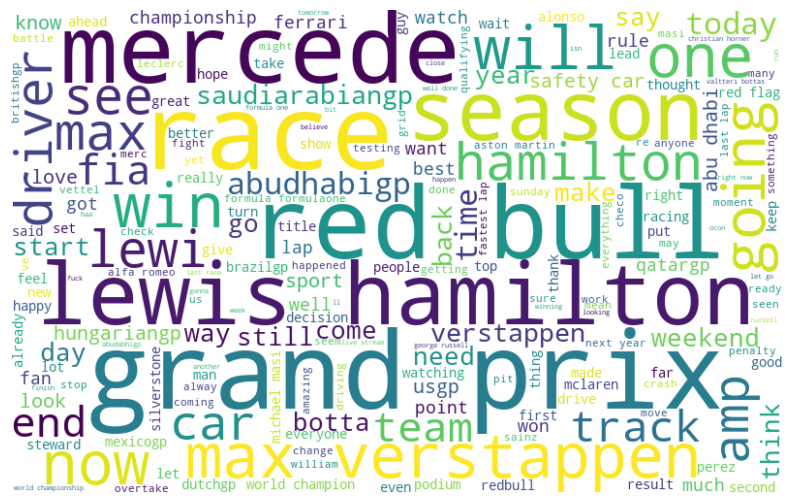

In [430]:
all_words = ' '.join([text for text in df_clean['processed_tweet']])
wordcloud = WordCloud(width=800, background_color="white",colormap="viridis", height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

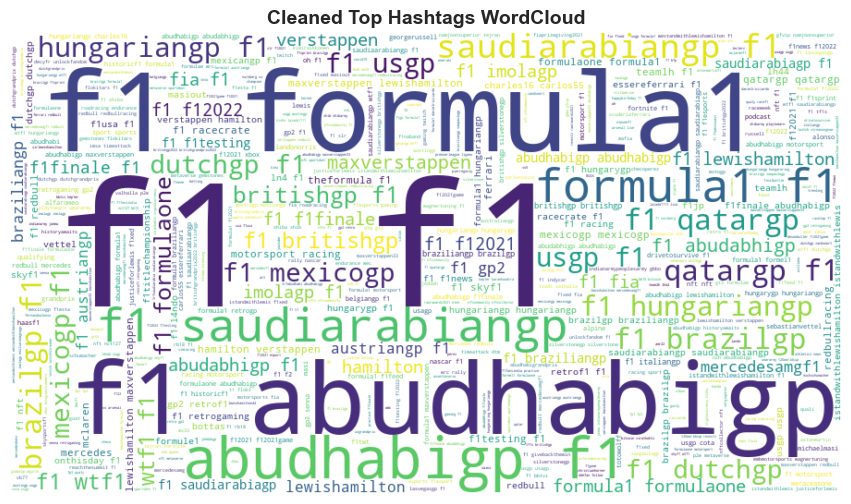

In [431]:
wordcloud = WordCloud( width=900,height=500, background_color="white",colormap="viridis",max_words=500).generate(hashtags_with_hash)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Cleaned Top Hashtags WordCloud", fontsize=14, fontweight='bold')
plt.show()

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Feature Engineering using VADER Sentiment Scores</h3>
</div>

In [432]:
def clean_and_tokenize(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)      # urls
    text = re.sub(r"@\w+", " ", text)                 # mentions
    text = re.sub(r"#", "", text)                     # keep hashtag word
    text = re.sub(r"[^a-z\s]", " ", text)             # letters only
    text = re.sub(r"\s+", " ", text).strip()
    tokens = text.split()
    tokens = [t for t in tokens if t not in STOPWORDS and t not in CUSTOM_STOPWORDS and len(t) > 2]
    return tokens

In [433]:
tweets["clean_text"] = tweets["text"].apply(clean_and_tokenize)

In [434]:
sia = SentimentIntensityAnalyzer()

In [436]:
def vader_analysis(text):
    score = sia.polarity_scores(str(text))["compound"]
    if score >= 0.05:
        label = "positive"
    elif score <= -0.05:
        label = "negative"
    else:
        label = "neutral"
    return pd.Series([score, label])

tweets[["vader_score", "vader_label"]] = tweets["text"].apply(vader_analysis)

In [332]:
tweets[["vader_clean_score", "vader_clean_label"]] = tweets["clean_text"].apply(vader_analysis)

In [333]:
def textblob_analysis(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    
    if polarity > 0:
        label = "positive"
    elif polarity < 0:
        label = "negative"
    else:
        label = "neutral"
        
    return pd.Series([polarity, label])

In [503]:
tweets[["textblob_score", "textblob_label"]] = tweets["text"].apply(textblob_analysis)

In [502]:
tweets[["textblob_clean_score", "textblob_clean_label"]] = tweets["clean_text"].apply(textblob_analysis)

In [336]:
tweets[["text", "textblob_label","vader_label","clean_text","textblob_clean_label","vader_clean_label"]].head()

,text,textblob_label,vader_label,clean_text,textblob_clean_label,vader_clean_label
3,Valteri Bottass tracking down Max Verstappen o...,negative,neutral,"[valteri, bottass, tracking, max, verstappen, ...",neutral,neutral
17,What day at the #Hungaroring as F1 put on an a...,positive,positive,"[day, hungaroring, put, absolutely, smashing, ...",positive,neutral
18,Half Season of MotoGP 🏁\n\nCompletely on : htt...,negative,neutral,"[half, season, motogp, completely, tags, motog...",negative,neutral
35,The FIA have sealed VET's car for further insp...,neutral,positive,"[fia, sealed, vet, car, inspection, aston, mar...",neutral,neutral
41,Verstappen is really gonna lose the championsh...,positive,negative,"[verstappen, really, gonna, lose, championship...",positive,neutral


In [337]:
pd.crosstab(tweets["vader_label"],tweets["textblob_label"])

textblob_label,negative,neutral,positive
vader_label,,,
negative,6113,4491,3958
neutral,2059,18092,5988
positive,2532,6182,24529


In [338]:
pd.crosstab(tweets["vader_clean_label"],tweets["textblob_clean_label"])

textblob_clean_label,negative,neutral,positive
vader_clean_label,,,
neutral,12586,29718,31640


In [339]:
tweets[["vader_score", "textblob_score"]].corr()

,vader_score,textblob_score
vader_score,1.000000,0.538213
textblob_score,0.538213,1.000000


In [340]:
tweets[["vader_clean_score","textblob_clean_score"]].corr()

,vader_clean_score,textblob_clean_score
vader_clean_score,NaN,NaN
textblob_clean_score,NaN,1.0


In [341]:
(tweets["vader_label"] != tweets["textblob_label"]).mean()

np.float64(0.34093367954127446)

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Comparision by Distirbution Across Vader vs Text Blob </h3>
</div>

In [500]:
sentiment_colors = {"negative": "#C1121F",  "neutral": "#ffb300","positive": "#2ECC71"}

In [498]:
sentiment_colors = {"negative": "#E10600","neutral": "#ffb300",  "positive": "#2ECC71"}

ValueError: Could not interpret value `textblob_label` for `x`. An entry with this name does not appear in `data`.

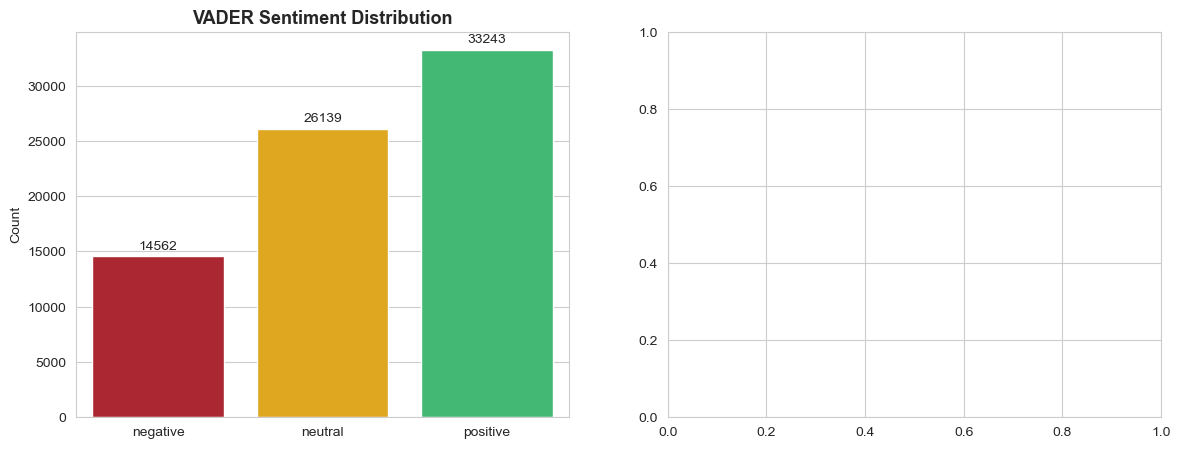

In [501]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14,5))
# VADER Plot
sns.countplot(data=tweets,x="vader_label",hue="vader_label",order=["negative","neutral","positive"],ax=axes[0],palette=sentiment_colors)
axes[0].set_title("VADER Sentiment Distribution", fontsize=13, fontweight="bold")
axes[0].set_xlabel("")
axes[0].set_ylabel("Count")
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', padding=3)
# TextBlob Plot
sns.countplot(data=tweets,x="textblob_label",hue="textblob_label",order=["negative","neutral","positive"],ax=axes[1],palette=sentiment_colors)
axes[1].set_title("TextBlob Sentiment Distribution", fontsize=13, fontweight="bold")
axes[1].set_xlabel("")
axes[1].set_ylabel("Count")
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', padding=3)
plt.tight_layout()
plt.show()

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Sentiment Analysis </h3>
</div>

#### Sentiment Distribution 2021 F1 tweets

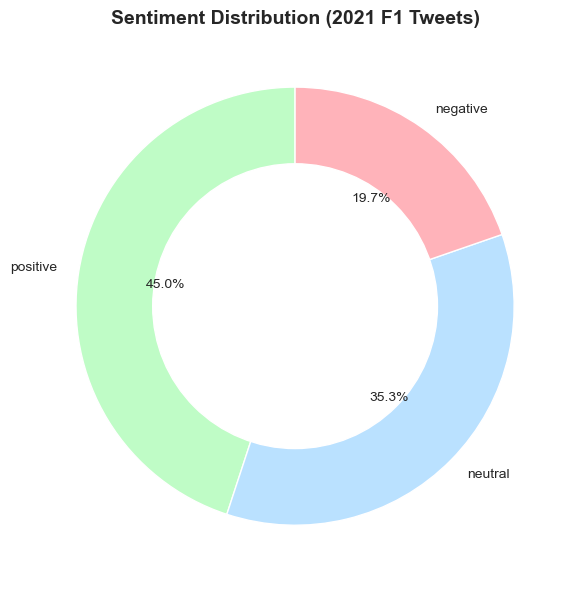

In [410]:
# Sentiment counts
sentiment_counts = tweets["vader_label"].value_counts()
# Pastel color palette
pastel_colors = {"negative": "#FFB3BA","neutral": "#BAE1FF","positive": "#BFFCC6" }
color_list = [pastel_colors[label] for label in sentiment_counts.index]
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(sentiment_counts,labels=sentiment_counts.index,autopct="%1.1f%%",startangle=90,colors=color_list,wedgeprops={"edgecolor": "white"})
# Donut center
centre_circle = plt.Circle((0,0), 0.65, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Sentiment Distribution (2021 F1 Tweets)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

#### Sentiment Over Time 

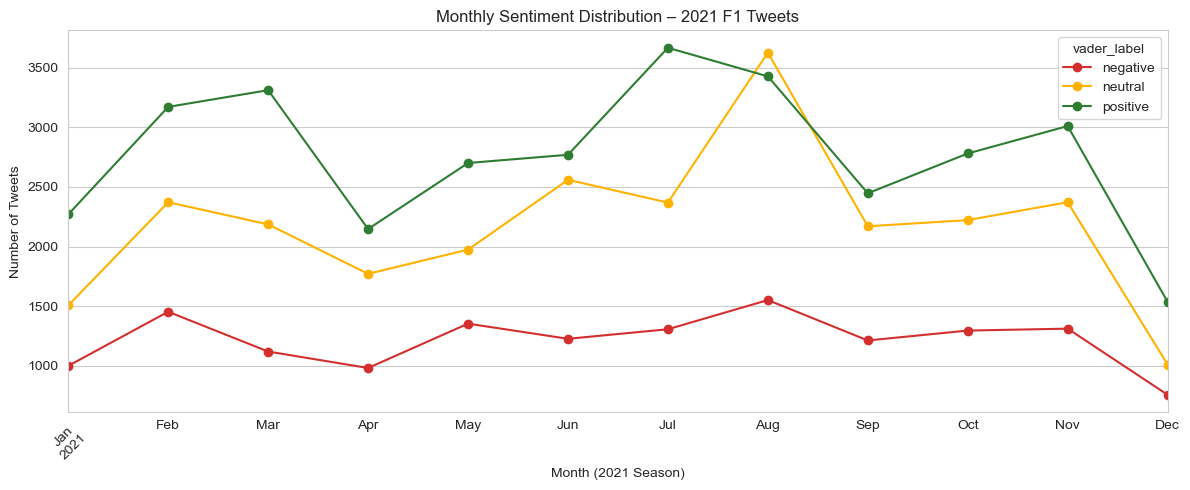

In [494]:
monthly_sentiment = (tweets.groupby(["month", "vader_label"]).size().unstack().fillna(0))
color_map = {"negative": "#d32f2f","neutral": "#ffb300","positive": "#2e7d32"}
ax = monthly_sentiment.plot(figsize=(12,5), marker="o",title = "Monthly Sentiment Distribution – 2021 F1 Tweets",color=[color_map[col] for col in monthly_sentiment.columns])
ax.set_xlabel("Month (2021 Season)")
ax.set_ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
Sentiment throughout the 2021 season remained predominantly positive, with positive tweets consistently outnumbering neutral and negative posts. Mid-season months, particularly July and August, show peak engagement and heightened sentiment activity. Negative sentiment remained comparatively lower but increased during high-intensity or controversial periods. Overall, fan engagement demonstrates strong positive momentum with event-driven fluctuations across the season.

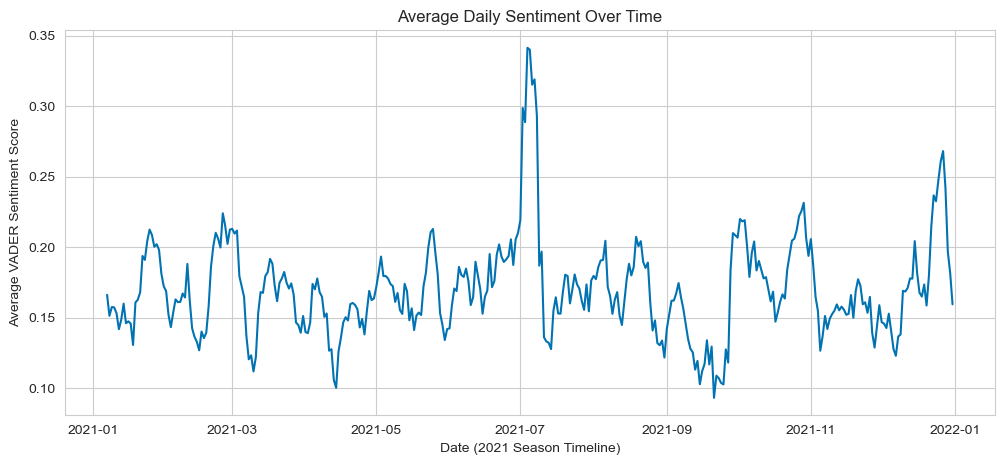

In [488]:
daily_sentiment = tweets.groupby(tweets["datetime"].dt.date)["vader_score"].mean()
ax = daily_sentiment.rolling(7).mean().plot(figsize=(12,5),  title="Average Daily Sentiment Over Time")
ax.set_xlabel("Date (2021 Season Timeline)")
ax.set_ylabel("Average VADER Sentiment Score")
plt.show()

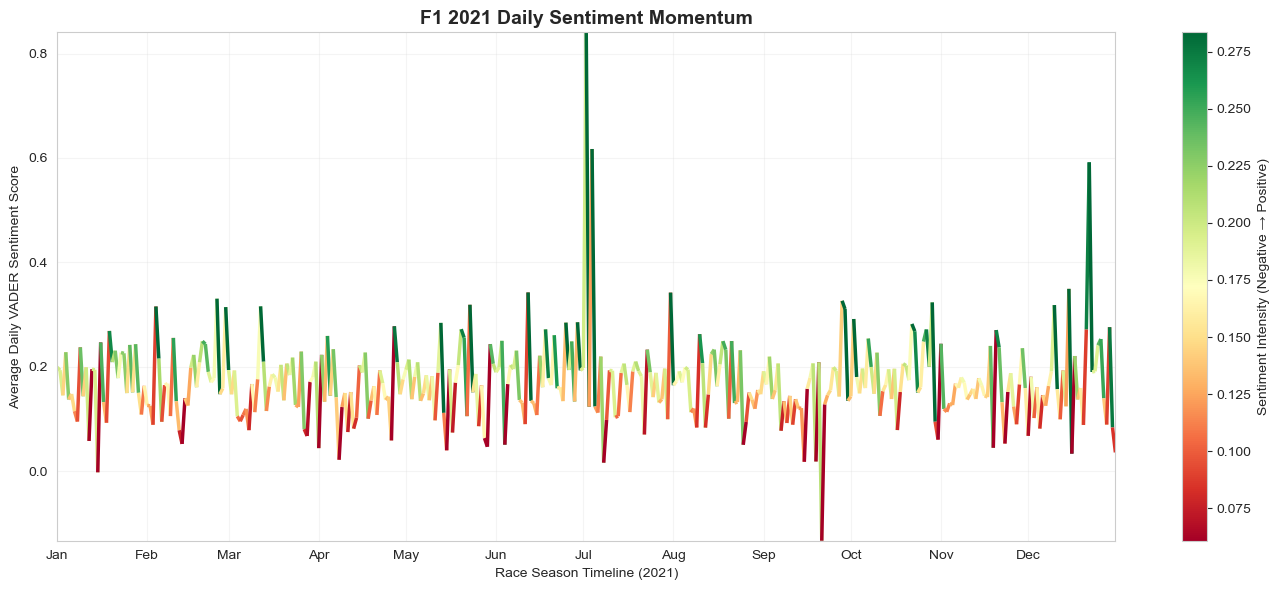

In [522]:
tweets["date"] = tweets["datetime"].dt.floor("D")
# Prepare DAILY sentiment 
daily_sentiment = tweets.groupby("date")["vader_score"].mean()
dates = daily_sentiment.index
y = daily_sentiment.values
# Convert dates for matplotlib
x = mdates.date2num(dates)
# Create line segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Normalize VADER scale (-1 to 1)
vmin, vmax = np.percentile(y, [5, 95])
norm = Normalize(vmin=vmin, vmax=vmax)
# F1 sentiment gradient: Red → Yellow → Green
lc = LineCollection(segments, cmap='RdYlGn', norm=norm)
lc.set_array(y)
lc.set_linewidth(2.5)
# Plot
fig, ax = plt.subplots(figsize=(14,6))
ax.add_collection(lc)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_title("F1 2021 Daily Sentiment Momentum", fontsize=14, fontweight='bold')
ax.set_xlabel("Race Season Timeline (2021)")
ax.set_ylabel("Average Daily VADER Sentiment Score")
# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.set_label("Sentiment Intensity (Negative → Positive)")
ax.grid(alpha=0.2)
plt.tight_layout()
plt.show()

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
Sentiment across the 2021 F1 season remained consistently positive, with noticeable spikes and dips aligned to key race events and competitive milestones. A significant mid-season surge suggests heightened fan engagement during pivotal moments. Temporary declines indicate periods of controversy or underperformance. Overall, sentiment trends reflect event-driven volatility, highlighting the value of time-aware sentiment monitoring for real-time engagement and risk detection.

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Hashtag Analysis of Whole Dataset</h3>
</div>

In [379]:
hashtags=df_clean["hashtags"].copy()

DROP_TAGS = {"f1", "formula1", "formulaone", "f12021", "f122021", "f1"}
DROP_TAGS = {"f1", "formula1", "formulaone", "f12021", "f122021", "f1"}


In [385]:
def parse_hashtags(val):
    if pd.isna(val):
        return []
    if isinstance(val, list):
        tags = val
    elif isinstance(val, str):
        s = val.strip()
        if s.startswith("[") and s.endswith("]"):
            try:
                tags = ast.literal_eval(s)
                if not isinstance(tags, list):
                    tags = [s]
            except Exception:
                tags = [t.strip() for t in s.split(",")]
        else:
            tags = [t.strip() for t in s.split(",")]
    else:
        tags = [str(val)]

    return [
        str(t).strip().lower().lstrip("#")
        for t in tags
        if str(t).strip() and str(t).strip().lower() != "nan"
    ]

In [377]:
hashtags

0                                  ['F1']
1                   ['HungarianGP', 'F1']
2                                  ['f1']
3                                  ['F1']
4                   ['HungarianGP', 'F1']
                       ...               
632383                   ['f1', 'NASCAR']
632384                             ['F1']
632385       ['F1', 'Formula1', 'F1News']
632386            ['F2', 'F1', 'IndyCar']
632387    ['F1', 'Indycar', 'SkyIndycar']
Name: hashtags, Length: 632388, dtype: object

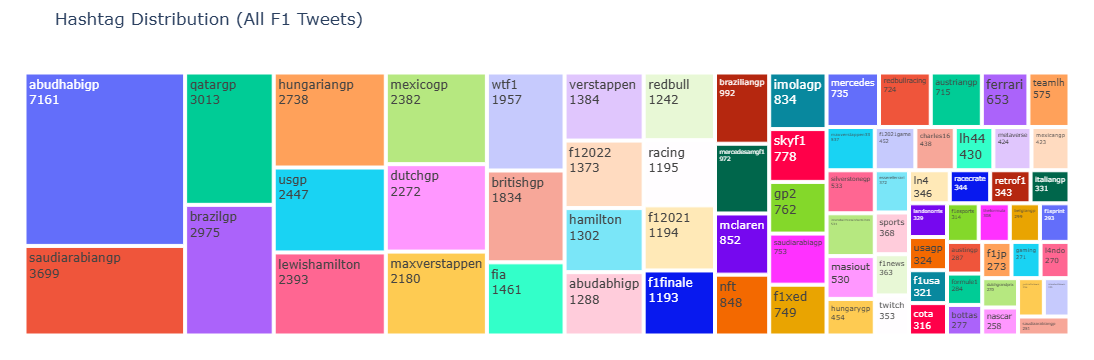

In [396]:
# Flatten ALL hashtags
all_tags = []
for v in tweets["hashtags"]:
    all_tags.extend(parse_hashtags(v))
DROP_TAGS = {"f1", "formula1", "formulaone", "f1testing", "motorsport","BTC","nfts","crypto","eth","floki","nftcommunity","retrogaming","nftcollector","bitcoin"}
all_tags = [t for t in all_tags if t not in DROP_TAGS]
# Count all hashtags
tag_counts = Counter(all_tags)
hashtag_df = pd.DataFrame(tag_counts.items(),columns=["hashtag", "count"])
hashtag_df = hashtag_df[hashtag_df["count"] > 250]
fig = px.treemap(hashtag_df,path=["hashtag"],values="count",title="Hashtag Distribution (All F1 Tweets)")
fig.update_traces(textinfo="label+value",hovertemplate="<b>%{label}</b><br>Count: %{value}<extra></extra>")
fig.update_layout(margin=dict(t=50, l=20, r=20, b=20))
fig.show()

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
The hashtag treemap reveals that #AbuDhabiGP dominates the dataset, indicating that the Abu Dhabi Grand Prix was the primary focal point of online conversation. This supports the project’s analytical focus, as the race served as the climactic and controversial event of the 2021 F1 season.

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Word Frequency Analysis using TFIDF</h3>
</div>

In [397]:
def identity(x): 
    return x
# Build token lists first
df_clean["tokens"] = df_clean["text"].apply(tokenize_clean)
vectorizer = TfidfVectorizer(tokenizer=identity,preprocessor=identity,token_pattern=None,min_df=5)
X = vectorizer.fit_transform(df_clean["tokens"])
feature_names = np.array(vectorizer.get_feature_names_out())

def top_tfidf_terms_for_sentiment(df, X, sentiment_col, sentiment_value, top_n=15):
    idx = df.index[df[sentiment_col] == sentiment_value].to_numpy()
    if len(idx) == 0:
        return pd.DataFrame(columns=["word", "score"])
    # mean tf-idf across documents in that sentiment
    mean_scores = X[idx].mean(axis=0).A1
    top_idx = mean_scores.argsort()[-top_n:][::-1]
    return pd.DataFrame({"word": feature_names[top_idx], "score": mean_scores[top_idx]})

In [346]:
neg_terms = top_tfidf_terms_for_sentiment(tweets, X, "vader_label", "negative", 15)
neu_terms = top_tfidf_terms_for_sentiment(tweets, X, "vader_label", "neutral", 15)
pos_terms = top_tfidf_terms_for_sentiment(tweets, X, "vader_label", "positive", 15)
tfidf_df = pd.concat([neg_terms.assign(sentiment="negative"),neu_terms.assign(sentiment="neutral"),pos_terms.assign(sentiment="positive"),], ignore_index=True)

In [347]:
tfidf_df.head()

,word,score,sentiment
0,max,0.019560,negative
1,lewis,0.017919,negative
2,hamilton,0.017911,negative
3,verstappen,0.015058,negative
4,saudiarabiangp,0.014874,negative


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">

**TFIDF Vectorizer** converts raw text into numerical features that machine learning models can understand. It converts text into a bag of word represetnation and weights each word using TF-IDF instead of simple counts.

1. Text -> Tokens
2. It builds a vocabulary across all tweets. Each word becomes a column in a matrix
3. Each tweet becomes a rom, and each word becomes a column. So, instead of storing raw count, it ctores TF-IDF Values
4. Applies TF-IDF Weighting ( TF-IDF = Term frequency * Inverse Document Frequence). Term Frequency is often a word appears in that tweer and inverse document frequency is how rare that word is across all tweets

Common words such as race, driver, f1 they appear a lot so they get lower weight. However, unique words such as robbed, rigged, unfair appears in fewer tweets and hence they get higher weight. 
TF-IDF reduces noise and empahizes signal. 

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Top Words by Sentiment </h3>
</div>

In [348]:
sentiment_colors = {"negative": "#E10600","neutral": "#6C757D",  "positive": "#00D26A" }

In [349]:
def get_word_counts_for_sentiment(df, sentiment_value, text_col="clean_text"):
    subset = df[df["vader_label"] == sentiment_value]
    tokens = []
    for t in subset[text_col]:
        tokens.extend(t)
    word_counts = Counter(tokens)
    return word_counts

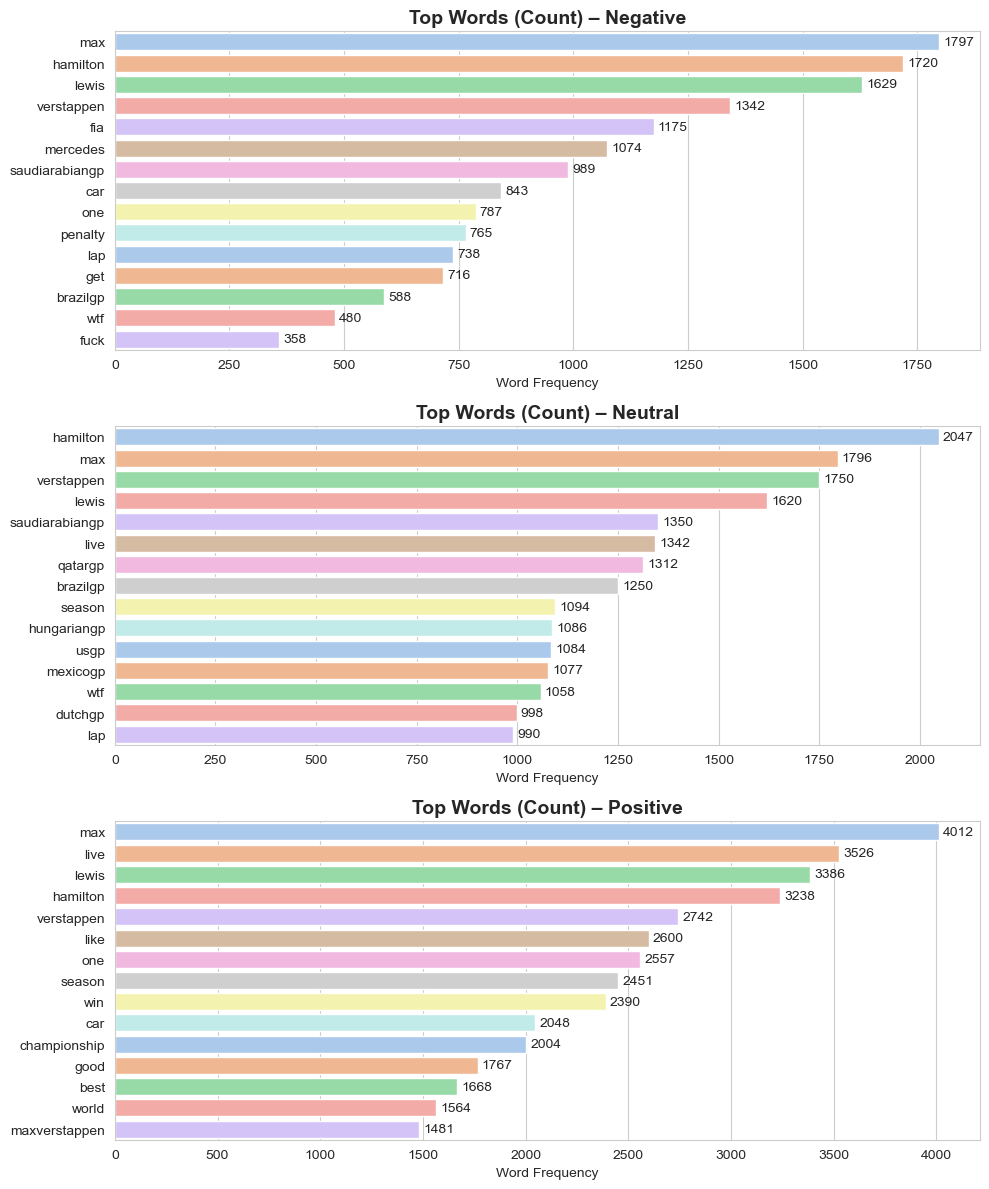

In [350]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
sentiments = ["negative", "neutral", "positive"]
for i, sentiment in enumerate(sentiments):
    # Get top TF-IDF words
    tfidf_words = tfidf_df[tfidf_df["sentiment"] == sentiment]["word"].tolist()
    # Get word counts
    word_counts = get_word_counts_for_sentiment(tweets, sentiment)
    # Extract counts only for top TF-IDF words
    top_counts = [(word, word_counts[word]) for word in tfidf_words]
    top_df = pd.DataFrame(top_counts, columns=["word", "count"]).sort_values("count", ascending=False)
    sns.barplot(data=top_df, x="count",y="word",hue="word",ax=axes[i],palette="pastel")
    axes[i].set_title(f"Top Words (Count) – {sentiment.capitalize()}",fontsize=14,fontweight='bold')
    axes[i].set_xlabel("Word Frequency")
    axes[i].set_ylabel("")
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt="%d", padding=3)
plt.tight_layout()
plt.show()

### Using Tree Map to Visualize Top Words

In [351]:
tree_data = []
sentiments = ["negative", "neutral", "positive"]
for sentiment in sentiments:
    # Get top TF-IDF words
    tfidf_words = tfidf_df[tfidf_df["sentiment"] == sentiment]["word"].tolist()
    # Get word counts
    word_counts = get_word_counts_for_sentiment(tweets, sentiment)
    # Extract counts only for top TF-IDF words
    for word in tfidf_words:
        tree_data.append({
            "sentiment": sentiment,
            "word": word,
            "count": word_counts[word]
        })
tree_df = pd.DataFrame(tree_data)
tree_df.head()

,sentiment,word,count
0,negative,max,1797
1,negative,lewis,1629
2,negative,hamilton,1720
3,negative,verstappen,1342
4,negative,saudiarabiangp,989


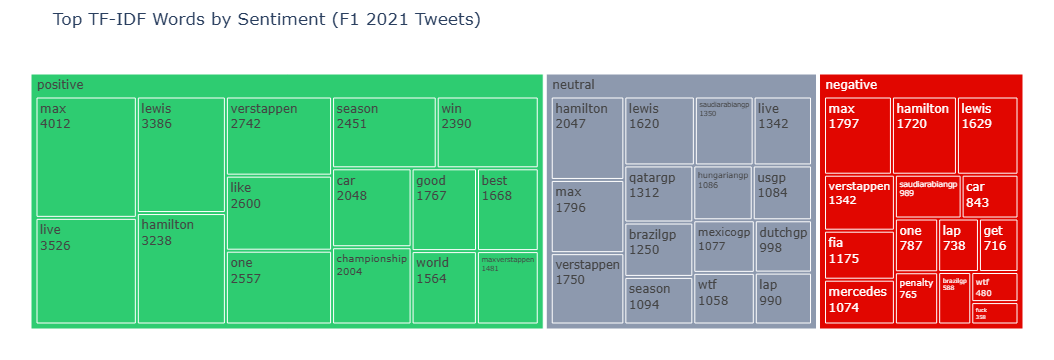

In [352]:
import plotly.express as px
color_map = {"negative": "#E10600","neutral": "#8D99AE","positive": "#2ECC71"}
fig = px.treemap(tree_df,path=["sentiment", "word"],values="count",color="sentiment",color_discrete_map=color_map,title="Top TF-IDF Words by Sentiment (F1 2021 Tweets)")
# Show word + count inside each box
fig.update_traces(textinfo="label+value",hovertemplate="<b>%{label}</b><br>Count: %{value}<extra></extra>")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

**Analysis of average score pre race, race day and post race day**

In [353]:
tweets["datetime"] = pd.to_datetime(tweets["date"])
abu = tweets[(tweets["datetime"] >= "2021-12-05") & (tweets["datetime"] <= "2021-12-20")].copy()
abu["period"] = abu["datetime"].apply(
    lambda d: "Pre" if d < pd.Timestamp("2021-12-12")
    else "Race Day" if d.date() == pd.Timestamp("2021-12-12").date()
    else "Post"
)
abu.groupby("period")[["vader_score","textblob_score"]].mean()

,vader_score,textblob_score
period,,
Post,0.168783,0.118012
Pre,0.094308,0.085310
Race Day,0.172070,0.092757


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">

**Analysis**: 
This is surprising. Since the expectation would be that race day or post race day to be more negative due to controversy. However, the averages are positive accross all periods. 
That means:

1. The dataset likely contains general F1 excitement tweets
2. Positive fan energy dominates average sentiment
3. Negative tweets exist, but don’t outweigh positives in mean score
</div>

**Analysis of Sentiments -  pre race, race day and post race day**

In [354]:
abu.groupby("period")["vader_label"].value_counts(normalize=True).unstack()

vader_label,negative,neutral,positive
period,,,
Post,0.240434,0.248299,0.511267
Pre,0.251508,0.357118,0.391374
Race Day,0.224897,0.302843,0.472260


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">

**Analysis**: 
The 2021 title decider increased emotional polarization, with positive sentiment rising sharply while negative sentiment remained steady.

</div>

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
The controversy did NOT increase overall negativity.

Instead it caused emotional divergence:
- Verstappen tweets became overwhelmingly positive.
- Hamilton tweets experienced a noticeable increase in negativity.
- Neutral discussion collapsed.
This is textbook fan-base polarization.

The 2021 Abu Dhabi title decider did not uniformly increase negativity; rather, it intensified emotional divergence across fan communities. Post-race sentiment associated with Verstappen shifted sharply positive, while Hamilton-related discourse experienced a measurable rise in negativity.
</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Model Evaluation</h3>
</div>

**Helper functions to run model evalutions**

In [406]:
vectorizer = TfidfVectorizer(min_df=3, stop_words="english", ngram_range=(1,2))
X = vectorizer.fit_transform(tweets['processed_tweet'])
y = tweets['vader_label']

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=tweets["vader_label"])

In [457]:
def model_evaluation(model_name,y_test,y_pred):
    
    class_names = ["Negative", "Neutral", "Positive"]
    cm = confusion_matrix(y_test, y_pred)  

    sns.heatmap(cm,annot=False,cmap="Blues",xticklabels=[f"Predicted {c}" for c in class_names],yticklabels=[f"Actual {c}" for c in class_names])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j + 0.5,i + 0.5,f"{cm[i, j]:,}",ha='center',va='center',fontsize=11,fontweight='bold',color='darkblue')

    plt.title("Confusion Matrix using "+model_name)
    plt.show()

    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).T
    # Rename rows for clarity
    report_df.rename(index={'0': 'Died (0)','1': 'Survived (1)','macro avg': 'Macro Avg','weighted avg': 'Weighted Avg'}, inplace=True)    
    accuracy = report_df.loc['accuracy', 'precision']
    report_df = report_df.drop(index='accuracy')
    report_df = report_df.round(3)
    
    # Style it
    styled_report = (report_df.style
        .format({
            "precision": "{:.2f}",
            "recall": "{:.2f}",
            "f1-score": "{:.2f}",
            "support": "{:.0f}"
        })
        .background_gradient(cmap="Blues", subset=["precision", "recall", "f1-score"])
        .set_caption(" Classification Report")
    )

    display(styled_report)    
    display(Markdown(f"### 🎯 Overall Accuracy: **{accuracy:.2%}**\n"))


    # Create boolean mask for misclassified rows
    mask = (y_test.to_numpy() != y_pred)
    
    # Build dataframe using aligned indices
    result_df = pd.DataFrame({
        "text": df.loc[y_test.index, "text"].to_numpy()[mask],
        "actual": y_test.to_numpy()[mask],
        "pred": y_pred[mask]
    })
    
    return report_df, result_df

In [458]:
def run_model(model_name, df=df_clean, y=y, random_state=42, drop_first=True,eval=False):
    base_models = {
        "SVM": LinearSVC(C=1.0,random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=2000,solver="lbfgs", random_state=42,class_weight='balanced'),
    }
    model = base_models[model_name]
    model.fit(X_train, y_train)
    print(f"{model_name} model trained successfully.")
    print("Making predictions on the test set...")   
    y_pred = model.predict(X_test)
    if eval:
        return model_evaluation(model_name,y_test,y_pred) 


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Model Evaluation : Logistic Regression</h3>
</div>

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
Logistic Regression estimates the probability that each tweet belongs to each sentiment class by applying a linear combination of TF-IDF features followed by the softmax function (multinomial logistic regression). The class with the highest predicted probability is selected as the final label.

Logistic Regression model trained successfully.
Making predictions on the test set...


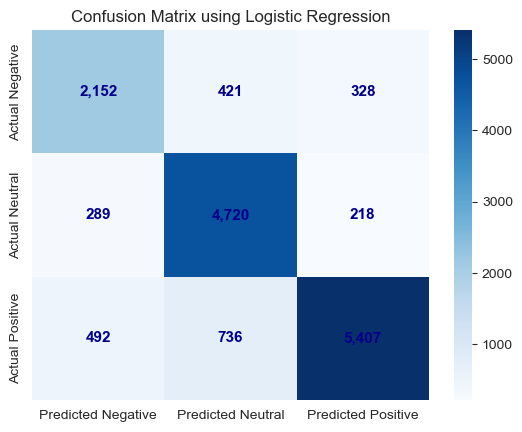

,precision,recall,f1-score,support
negative,0.73,0.74,0.74,2901
neutral,0.80,0.90,0.85,5227
positive,0.91,0.81,0.86,6635
Macro Avg,0.81,0.82,0.82,14763
Weighted Avg,0.84,0.83,0.83,14763


### 🎯 Overall Accuracy: **83.17%**


In [460]:
log_reg, log_mis_df = run_model("Logistic Regression",eval=True)

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
    
**Analysis** Incorporating class balancing and n-gram features significantly improved negative class recall from 0.58 to 0.74, enhancing the model’s ability to detect critical discourse during controversial race events.

**Classes**
1. The model demonstrates strong precision for positive sentiment (91%), meaning positive predictions are highly reliable. However, with recall at 81%, approximately 19% of positive tweets were misclassified.
2. The model achieved high recall (90%) for neutral sentiment, successfully capturing most neutral tweets, with only 10% misclassified.
3. The model balances detection and reliability for negative tweets, correctly identifying 74% of actual negatives while maintaining 73% precision.

**Interpretation** - The classifier achieved strong performance for positive sentiment (Precision = 0.91, Recall = 0.81), indicating high reliability in positive predictions. Neutral sentiment demonstrated the highest recall (0.90), suggesting effective capture of non-polarized discourse. Negative sentiment performance improved substantially (Recall = 0.74), enhancing detection of critical or controversial language.

</div>


In [468]:
n=5
topn = log_mis_df.head(n)
for _, row in top10.iterrows():
    print("TEXT:", row["text"])
    print("ACTUAL:", row["actual"])
    print("PRED:", row["pred"])
    print("-" * 80)

TEXT: #f1jp #f1
MAX what’s a race !!vamos！！
ACTUAL: neutral
PRED: negative
--------------------------------------------------------------------------------
TEXT: Charles is told to not criticize the team #f1 https://t.co/vcLSu2XPhJ
ACTUAL: positive
PRED: neutral
--------------------------------------------------------------------------------
TEXT: BIGGEST ROBBERY IN MOTORSPORT 
SEEN BY FANS WHO DEDICATED THEIR TIME TO WATCH A ROBBERY LIVE ON TV
#AbuDhabiGP
#F1
ACTUAL: positive
PRED: neutral
--------------------------------------------------------------------------------
TEXT: It was a miracle that the cars weren't significantly damaged after the crash. Lewis got a small damage on the front right wing but still had the pace to make the difference. 
The last race will determine the winner and I can’t wait.  #SaudiArabianGP #F1 #LewisHamilton #Supermax https://t.co/2h21qaElNh
ACTUAL: positive
PRED: negative
--------------------------------------------------------------------------------
T

In [478]:
log_mis_df["length"] = log_mis_df["text"].apply(len)
log_mis_df["length"].describe()

count    2484.000000
mean      154.983494
std        80.296371
min        10.000000
25%        89.000000
50%       136.000000
75%       220.000000
max       361.000000
Name: length, dtype: float64

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">

#### 🔎 Error Analysis Summary

A review of misclassified tweets highlights three primary issues affecting model performance.

First, there is notable confusion between **Neutral and Positive** classes. Mild praise or subtle sentiment without strong emotional keywords is often classified as neutral, indicating limited sensitivity to sentiment intensity.

Second, some **Negative tweets are misclassified as Positive**, likely due to domain-specific keywords (e.g., driver names, race terms) that frequently appear in positive contexts. This suggests the model is influenced more by topic-related terms than true sentiment.

Third, tweets containing hashtags, URLs, emojis, and conversational tone introduce noise and contextual ambiguity. The TF-IDF representation struggles to capture implicit meaning, sarcasm, or nuanced tone shifts.

Overall, misclassifications are driven primarily by contextual limitations and subtle sentiment expression rather than tweet length or structural factors.

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Model Evaluation : Linear SVM</h3>
</div>

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
SVM finds a hyperplane that separates classes while maximizing the margin. Margin = distance between the decision boundary and the closest points.

The model chooses the boundary that:
- Separates classes
- Maximizes confidence
- Minimizes classification error

SVM works well with TF-IDF since my data is high dimensional, sparse and linearly seperable. Also, i am using class_weight=balanced because of which it learns weight coefficient for each word, assigns higher penalty to minority class erros and optimizes hinge loss.

SVM model trained successfully.
Making predictions on the test set...


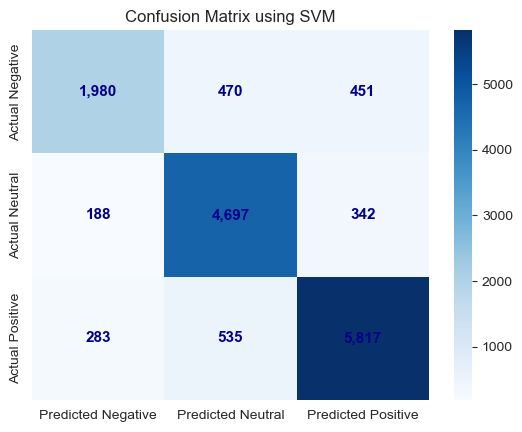

,precision,recall,f1-score,support
negative,0.81,0.68,0.74,2901
neutral,0.82,0.90,0.86,5227
positive,0.88,0.88,0.88,6635
Macro Avg,0.84,0.82,0.83,14763
Weighted Avg,0.85,0.85,0.84,14763


### 🎯 Overall Accuracy: **84.63%**


In [464]:
svm, svm_miss = run_model("SVM",eval=True)

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
    
| Sentiment | Precision | Recall | F1-Score | Interpretation |
|------------|------------|--------|----------|----------------|
| **Negative** | 0.81 | 0.68 | 0.74 | It predicts negative correct 81% of time. And it detects 68% of all negative tweets, so this model missed about 32% of real negative tweets. |
| **Neutral** | 0.82 | 0.9 | 0.86 | The model captures 90% of all neutral tweets. 82% of those predicted neutral are correct |
| **Positive** | 0.88 | 0.88 | 0.88 | Very balanced performance |


#### Summary Statement
The SVM classifier achieved a weighted F1-score of 0.84. Performance was strongest for positive sentiment (F1 = 0.88), while negative recall (0.68) suggests some difficulty in capturing subtle critical language common in controversial discourse.
</div>


In [467]:
n=5
topn = svm_miss.head(5)
for _, row in top10.iterrows():
    print("TEXT:", row["text"])
    print("ACTUAL:", row["actual"])
    print("PRED:", row["pred"])
    print("-" * 80)

TEXT: #f1jp #f1
MAX what’s a race !!vamos！！
ACTUAL: neutral
PRED: negative
--------------------------------------------------------------------------------
TEXT: Charles is told to not criticize the team #f1 https://t.co/vcLSu2XPhJ
ACTUAL: positive
PRED: neutral
--------------------------------------------------------------------------------
TEXT: BIGGEST ROBBERY IN MOTORSPORT 
SEEN BY FANS WHO DEDICATED THEIR TIME TO WATCH A ROBBERY LIVE ON TV
#AbuDhabiGP
#F1
ACTUAL: positive
PRED: neutral
--------------------------------------------------------------------------------
TEXT: It was a miracle that the cars weren't significantly damaged after the crash. Lewis got a small damage on the front right wing but still had the pace to make the difference. 
The last race will determine the winner and I can’t wait.  #SaudiArabianGP #F1 #LewisHamilton #Supermax https://t.co/2h21qaElNh
ACTUAL: positive
PRED: negative
--------------------------------------------------------------------------------
T

In [469]:
svm_miss["length"] = svm_miss["text"].apply(len)
svm_miss["length"].describe()

count    2269.000000
mean      157.982812
std        80.460810
min        13.000000
25%        91.000000
50%       141.000000
75%       224.000000
max       349.000000
Name: length, dtype: float64

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">

#### 🔎 Error Analysis Summary

A structured review of misclassified tweets reveals that model performance is primarily limited by three factors.

First, there is consistent overlap between **Neutral and Positive** classes. Subtle praise or moderate sentiment intensity is often classified as neutral, indicating limited sensitivity to nuanced positive language.

Second, **Negative recall (~0.68) remains the primary bottleneck**. Some negative tweets lack explicit negative keywords, causing them to be misclassified as neutral and reducing overall Macro-F1.

Third, contextual limitations inherent to TF-IDF impact performance. The model struggles with sarcasm, irony, implied tone shifts, and sentiment expressed through structure rather than explicit vocabulary. Additionally, URLs, hashtags, and emojis introduce noise that is not fully leveraged in the current feature representation.

Tweet length does not appear to significantly influence errors, suggesting misclassification is driven primarily by semantic and contextual limitations rather than structural characteristics.

Future improvements should focus on enhancing contextual understanding, improving minority-class recall, and refining feature engineering to reduce class boundary ambiguity.

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Model Comparison</h3>
</div>

In [474]:
def extract_from_df(df, model_name):
    return {
        "Model": model_name,
        
        "Negative_Precision": df.loc["negative", "precision"],
        "Negative_Recall": df.loc["negative", "recall"],
        "Negative_F1": df.loc["negative", "f1-score"],
        
        "Neutral_F1": df.loc["neutral", "f1-score"],
        "Positive_F1": df.loc["positive", "f1-score"],
        
        "Macro_F1": df.loc["Macro Avg", "f1-score"],
        "Weighted_F1": df.loc["Weighted Avg", "f1-score"]
    }

model_comparison = pd.DataFrame([extract_from_df(log_reg, "Logistic Regression"),extract_from_df(svm, "SVM")])
model_comparison = model_comparison.round(3)
model_comparison.style.highlight_max(color='lightgreen')


,Model,Negative_Precision,Negative_Recall,Negative_F1,Neutral_F1,Positive_F1,Macro_F1,Weighted_F1
0,Logistic Regression,0.734000,0.742000,0.738000,0.850000,0.859000,0.816000,0.832000
1,SVM,0.808000,0.683000,0.740000,0.860000,0.878000,0.826000,0.844000


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> 📊 Executive Insights</h3>
</div>

The objective of this project was to develop a reliable multi-class sentiment classification system for 2021 Formula 1 tweets, categorizing public opinion into **Positive, Neutral, and Negative** classes.

Monitoring large volumes of social media data manually is inefficient and inconsistent. Organizations require automated systems to:

- Track fan sentiment in real time  
- Detect dissatisfaction or controversy early  
- Quantify public reaction to race outcomes and driver performance  
- Measure brand perception trends over time  

This project addresses the challenge of converting unstructured Twitter text into structured, actionable sentiment signals.

---

### Solution Delivered

A supervised NLP pipeline was developed using:

- **TF-IDF feature engineering**
- **Logistic Regression**
- **Linear Support Vector Machine (SVM)**

The final SVM model achieved:

- **Macro-F1: 0.826**
- Strong Neutral and Positive F1 performance
- Balanced overall classification across three sentiment classes

The system transforms raw tweet data into structured sentiment outputs that can be aggregated and analyzed at scale.

---

### Key Insights

- **Negative recall (~0.68) is the primary performance bottleneck**, limiting overall Macro-F1.
- Linear SVM outperformed Logistic Regression across most evaluation metrics.
- TF-IDF with word n-grams provides strong baseline performance for domain-specific Twitter sentiment classification.

---

### Business Impact

This solution enables:

- Automated sentiment monitoring at scale
- Early identification of reputation risks
- Quantitative tracking of fan engagement trends
- Data-driven insights for marketing and communications strategy

By structuring social media sentiment into measurable outputs, the model provides a scalable foundation for sports analytics and social media intelligence applications.

---

#### ⚠️ Limitations

Despite strong performance, several limitations remain:

#### 1️⃣ Contextual Understanding Limitations

TF-IDF is a bag-of-words model and does not fully capture:

- Long-range contextual meaning  
- Sarcasm or irony  
- Subtle sentiment shifts  
- Complex negation beyond short n-grams  

As a result, tweets with implicit sentiment may be misclassified.

#### 2️⃣ Lower Negative Recall

Negative class recall remains the weakest metric.  
The model may:

- Misclassify borderline negative tweets as neutral  
- Under-detect subtle dissatisfaction  

This directly suppresses Macro-F1 performance.

#### 3️⃣ Sensitivity to Noisy Twitter Language

Tweets include slang, abbreviations, misspellings, emojis, and hashtags.  
While n-grams help, TF-IDF does not fully model linguistic variation.

#### 4️⃣ Temporal Drift

Language patterns may shift across the 2021 F1 season due to race events and controversies.  
The model may generalize less effectively outside the evaluation window.

#### 5️⃣ Linear Model Constraints

Logistic Regression and Linear SVM assume linear separability and may struggle with nuanced contextual dependencies. Transformer-based models could capture richer semantic relationships.

---

#### 🚀 Future Optimization

To further improve Macro-F1 and robustness:

- Improve Negative Recall through targeted feature engineering
- Add character n-grams (3–5) for improved handling of noisy Twitter text
- Calibrate model outputs and tune thresholds to optimize Macro-F1
- Perform temporal split validation to measure drift robustness
- Explore contextual embeddings (e.g., transformer-based models)

---

#### Strategic Conclusion

This project demonstrates the ability to:

- Build and evaluate multi-class NLP classification systems
- Optimize models using Macro-F1 for balanced performance
- Perform structured error analysis
- Translate technical findings into business-relevant insights

The system provides a strong baseline for scalable sentiment intelligence while outlining a clear roadmap for further performance improvement.